<a href="https://colab.research.google.com/github/xoiga123/FPTU/blob/master/MAN201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

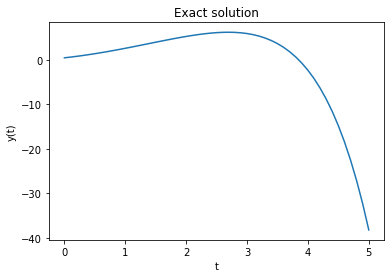

In [131]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    dydt = y - t**2 + 1
    return dydt

# initial condition
y0 = 0.5

# time points
t = np.linspace(0,5, 51)
t_001 = np.linspace(0, 5, 501)

# solve ODE
y = odeint(model,y0,t)
y_001 = odeint(model,y0,t_001)

# plot results
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Exact solution')
plt.show()

In [132]:
def step_Euler(y, t, h, f):
    """Performs a single step of Euler's method.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + h * f(y, t)
    return next_y


def full_Euler(h, f, y_0 = 1, start_t = 0, end_t = 1):
    """ A full numerical aproximation of an ODE in a set time interval. Performs consecutive Euler steps
    with step size h from start time until the end time. Also takes into account the initial values of the ODE
    
    Parameters:
            h: Step size
            f: RHS of our ODE
            y_0 : Initial condition for y at t = start_t
            start_t : The time at the initial condtion, t_0
            end_t : The end of the interval where the Euler method is perfomed, t_N
        Returns:
            y_list: Numerical approximation of y at times t_list
            t_list: Evenly spaced discrete list of time with spacing h. 
                    Starting time = start_t, and end time = end_t 
    """
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N steps
    for i in range(0, N):
        y_list[i + 1] = step_Euler(y_list[i], t_list[i], h, f)
    return y_list, t_list 

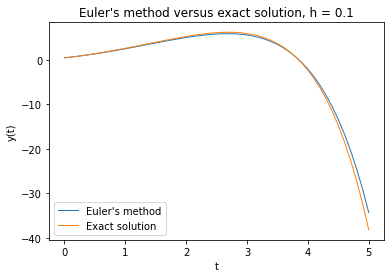

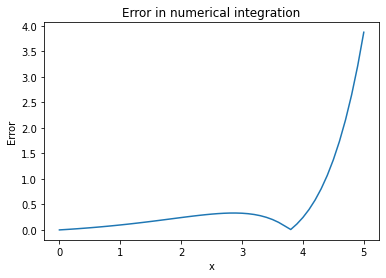

In [133]:
def g(y, t):
    """Defines the right hand side of our differential equation. In our case of bacterial growth, g(y) = k*y
    
    Parameters:
            y: Numerical approximation of y at time t
    """
    dydt = y - t**2 + 1
    return dydt

# Now we can find the the numerical results from Euler's method
# and compare them to the analytical solution

# Input parameters
y_0 = 0.5  # Initial
h = 0.1 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Euler's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("Euler's method versus exact solution, h = 0.1")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y.flatten() - y_list)
plt.plot(t, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

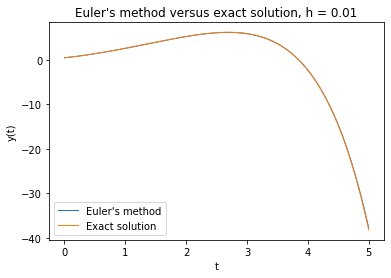

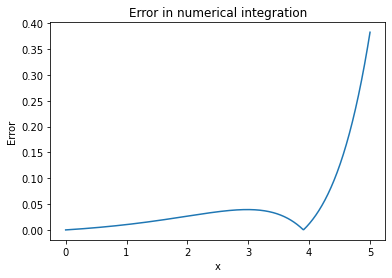

In [134]:
# Input parameters
y_0 = 0.5  # Initial 
h = 0.01 # Step size
t_0 = 0
t_N = 5


# Calculating results from Euler and plotting them
y_list, t_list = full_Euler(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Euler's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t_001, y_001, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("Euler's method versus exact solution, h = 0.01")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y_001.flatten() - y_list)
plt.plot(t_001, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

In [135]:
def step_Taylor_2nd(y, t, h, f, f_derivative):
    """Performs a single step of Taylor's method of 2nd order.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
            f_derivative: Derivative of function f.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + h * f(y, t) + (h ** 2) * f_derivative(y, t)
    return next_y

def full_Taylor_2nd(h, f, f_derivative, y_0 = 1, start_t = 0, end_t = 1):
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N steps
    for i in range(0, N):
        y_list[i + 1] = step_Taylor_2nd(y_list[i], t_list[i], h, f, f_derivative)
    return y_list, t_list 

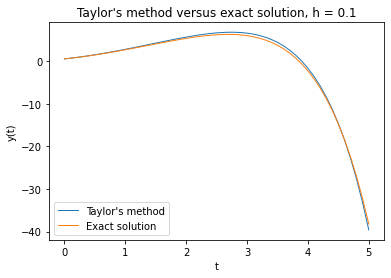

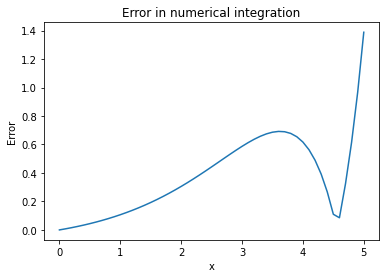

In [136]:
def g_derivative(y, t):
    """Defines the differential equation.
    
    Parameters:
            y: Numerical approximation of y at time t
    """
    g_derivative = y - t**2 + 1 - 2*t
    return g_derivative

# Now we can find the the numerical results from Taylor's 2nd method
# and compare them to the analytical solution

# Input parameters
y_0 = 0.5  # Initial
h = 0.1 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from Taylor's and plotting them
y_list, t_list = full_Taylor_2nd(h, g, g_derivative, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Taylor's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("Taylor's method versus exact solution, h = 0.1")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y.flatten() - y_list)
plt.plot(t, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

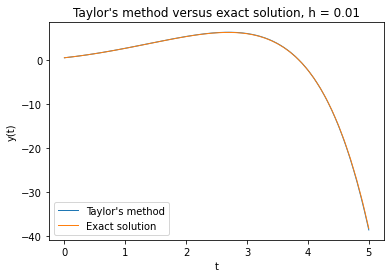

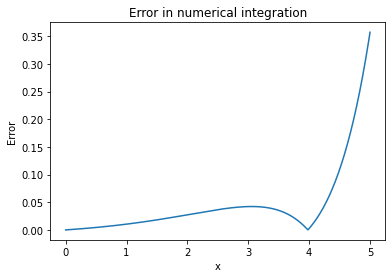

In [137]:
# Input parameters
y_0 = 0.5  # Initial
h = 0.01 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from Taylor's and plotting them
y_list, t_list = full_Taylor_2nd(h, g, g_derivative, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="Taylor's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("Taylor's method versus exact solution, h = 0.01")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y_001.flatten() - y_list)
plt.plot(t_001, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

In [138]:
def step_RK_2nd(y, t, h, f):
    """Performs a single step of Taylor's method of 2nd order.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    next_y = y + (h / 2) * (f(y, t) + f(y + h * f(y, t), t + h))
    return next_y

def full_RK_2nd(h, f, y_0 = 1, start_t = 0, end_t = 1):
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N steps
    for i in range(0, N):
        y_list[i + 1] = step_RK_2nd(y_list[i], t_list[i], h, f)
    return y_list, t_list 

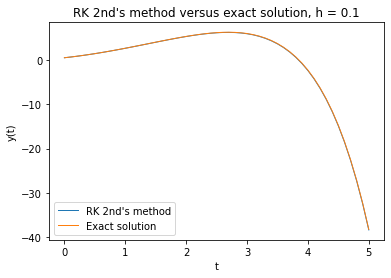

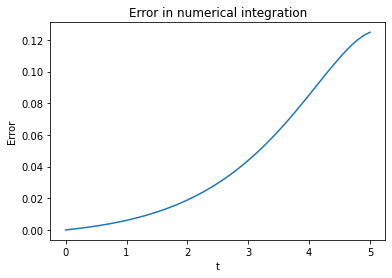

In [139]:
# Input parameters
y_0 = 0.5  # Initial
h = 0.1 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from RK 2nd's and plotting them
y_list, t_list = full_RK_2nd(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="RK 2nd's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("RK 2nd's method versus exact solution, h = 0.1")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y.flatten() - y_list)
plt.plot(t, y_diff)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error in numerical integration");

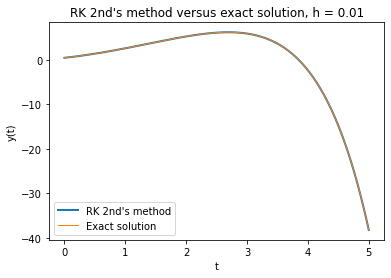

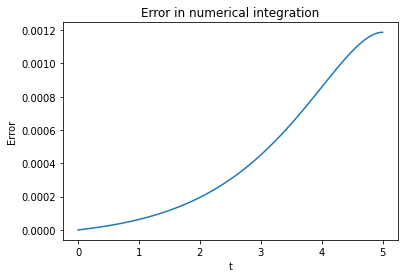

In [140]:
# Input parameters
y_0 = 0.5  # Initial
h = 0.01 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from RK 2nd's and plotting them
y_list, t_list = full_RK_2nd(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="RK 2nd's method", linewidth=2)

# Plotting the analytical solution derived earlier
plt.plot(t_001, y_001, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("RK 2nd's method versus exact solution, h = 0.01")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y_001.flatten() - y_list)
plt.plot(t_001, y_diff)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error in numerical integration");

In [141]:
def step_RK_4th(y, t, h, f):
    """Performs a single step of Runge-Kutta's method of 4th order.
    
    Parameters:
            y: Numerical approximation of y at time t
            h: Step size
            f: RHS of our ODE (RHS = Right hand side). Can be any function that only has y as a variable.
        Returns:
            next_y: Numerical approximation of y at time t+h
    """
    k1 = f(y, t)
    k2 = f(y + (h/2) * k1, t + h/2)
    k3 = f(y + (h/2) * k2, t + h/2)
    k4 = f(y + h*k3, t + h)
    next_y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return next_y

def full_RK_4th(h, f, y_0 = 1, start_t = 0, end_t = 1):
    # Number of discretisation steps
    N = int((end_t - start_t) / h)
    # Following the notation in the theory, we have N+1 discrete time values linearly spaced
    t_list = np.linspace(start_t, end_t, N + 1)
    
    # Initialise array to store y-values
    y_list = np.zeros(N + 1)
    # Assign initial condition to first element
    y_list[0] = y_0
    
    # Assign the rest of the array using N steps
    for i in range(0, N):
        y_list[i + 1] = step_RK_4th(y_list[i], t_list[i], h, f)
    return y_list, t_list 

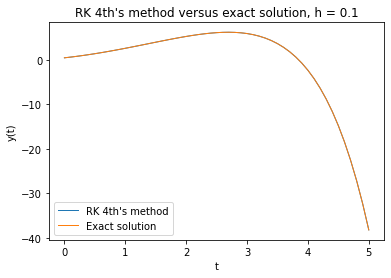

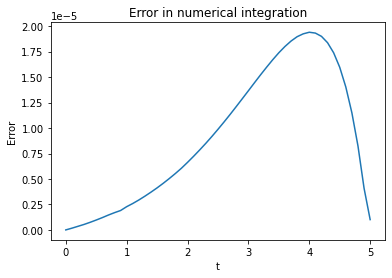

In [142]:
# Input parameters
y_0 = 0.5  # Initial
h = 0.1 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from RK 4th's and plotting them
y_list, t_list = full_RK_4th(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="RK 4th's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("RK 4th's method versus exact solution, h = 0.1")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y.flatten() - y_list)
plt.plot(t, y_diff)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error in numerical integration");

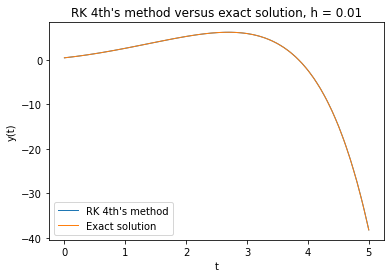

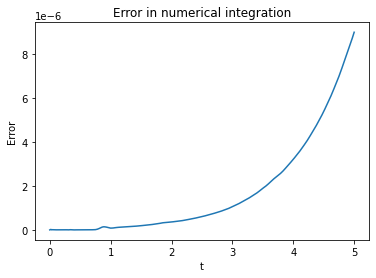

In [143]:
# Input parameters
y_0 = 0.5  # Initial
h = 0.01 # Step size
t_0 = 0  
t_N = 5 


# Calculating results from RK 4th's and plotting them
y_list, t_list = full_RK_4th(h, g, y_0, t_0, t_N)
plt.plot(t_list, y_list, label="RK 4th's method", linewidth=1)

# Plotting the analytical solution derived earlier
plt.plot(t, y, label="Exact solution", linewidth=1)

# Making the plot look nice
plt.legend()
plt.title("RK 4th's method versus exact solution, h = 0.01")
plt.xlabel(r't')
plt.ylabel(r'y(t)')
plt.show()

y_diff = np.abs(y_001.flatten() - y_list)
plt.plot(t_001, y_diff)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error in numerical integration");